<a href="https://colab.research.google.com/github/Lucca465/machine_learning_credit_risk/blob/main/machine_learning_credit_riks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O objetivo deste projeto é analisar e desenvolver um algoritmo capaz de prever se um indivíduo irá ou não pagar um empréstimo. Para isso, utilizaremos uma base de dados histórica de classificação chamada risco de crédito, contendo informações em cinco colunas:

1. clientid: identificador único do cliente
2. income: renda do cliente
3. age: idade do cliente
4. loan: valor total dos empréstimos contratados
5. default: status de pagamento (0 indica que o cliente quitou o empréstimo, enquanto 1 significa inadimplência)

Esse estudo tem como finalidade auxiliar instituições financeiras na tomada de decisão, minimizando riscos e otimizando a concessão de crédito.

# Configuração inicial

**Importação das bibliotecas**

Para a análise e visualização dos dados, utilizamos as seguintes bibliotecas:

In [ ]:
import pandas as pd  # Manipulação e análise de dados
import numpy as np  # Operações numéricas e tratamento de dados
import seaborn as sns  # Visualização de dados estatísticos
import matplotlib.pyplot as plt  # Criação de gráficos estáticos
import plotly.express as px  # Visualizações interativas

Cada uma dessas bibliotecas desempenha um papel fundamental na exploração e análise dos dados, permitindo desde a manipulação eficiente até a geração de visualizações dinâmicas e estatísticas.

**Carregamento da Base de Dados**

Para importar os dados, utilizamos a biblioteca pandas, que permite manipular e analisar conjuntos de dados de forma eficiente. O arquivo credit_data.csv é carregado da seguinte maneira:

In [ ]:
url = 'https://raw.githubusercontent.com/Lucca465/machine_learning_credit_risk/refs/heads/main/credit_data.csv'
house_prices = pd.read_csv(url)
house_prices

Após esse processo, a base de dados estará disponível na variável base_credit, possibilitando a exploração e análise dos dados.

# Análise inicial

**Análise da Base de Dados Carregada**


Após o carregamento da base de dados, podemos visualizar seu conteúdo executando o seguinte comando:




In [ ]:
base_credit

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


Esse comando exibirá a tabela completa, mas para uma análise inicial mais eficiente, podemos utilizar algumas funções do pandas:

In [ ]:
# Exibir os tipos de dados de cada coluna do dataset
base_credit.dtypes

,0
clientid,int64
income,float64
age,float64
loan,float64
default,int64


Digitando o comando dtypes do pandas, ele nos traz qual o tipo de variável de cada caluna da base de dados, com essa informação e analisando mais a base de dados podemos concluir que os tipos de variáveis de cada coluna são:

1.   **clientid** - Variável categórica nominal.
2.   **income** -  Variável numérica contínua.
3.   **age** - Variável numérica contínua.
4.   **loan** -  Variável numérica contínua.
5.   **default** - Variável numérica discreta.

Entender o tipo de variável é fundamental para realizar análises relevantes, escolher as visualizações corretas, construir modelos preditivos e interpretar os resultados com precisão.

In [ ]:
# Exibir informações gerais sobre o dataset, como tipos de dados e valores nulos
base_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.3 KB


In [ ]:
# Resumo estatístico das variáveis numéricas
base_credit.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


O método describe() do Pandas fornece um resumo estatístico descritivo das variáveis numéricas do seu DataFrame, oferecendo insights valiosos sobre a distribuição dos seus dados e guiando as etapas subsequentes da sua análise.

A partir dessa análise, podemos observar dois pontos importantes na coluna age (idade):

* Existência de valores nulos: a coluna contém três registros sem informação de idade.
* Presença de um valor mínimo negativo: o que não faz sentido para a variável idade.



# Visualização dos dados

O comando a seguir tem a função de descubrir quantas pessoas na base de dados pagou ou não a dívida.

In [ ]:
np.unique(base_credit.default, return_counts=True)

(array([0, 1]), array([1717,  283]))

Percebemos que 1717 pessoas pagam seus empréstimos e somente 283 pessoa que não pagam seus empréstimos. Tornando uma base de dados desbalanceada.

Podemos utilizar um histograma ou um boxplot para visualizar melhor essa diferença.

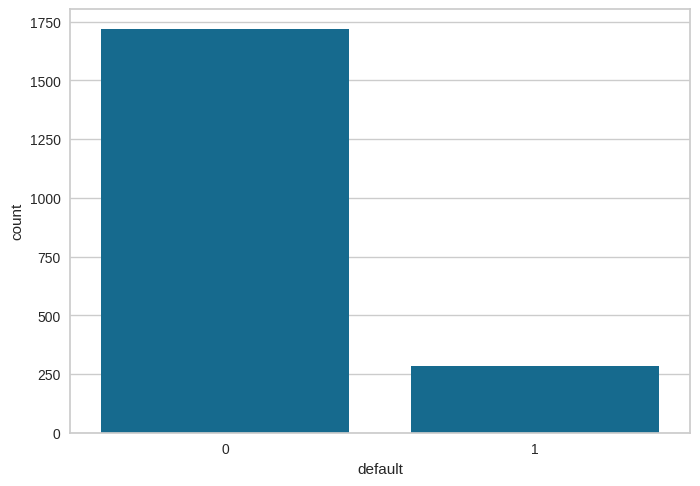

In [ ]:
#Utizando o countplot para pegar somente os valores 0 e 1.
sns.countplot(x=base_credit.default);

Agora, vamos analisar cada coluna.

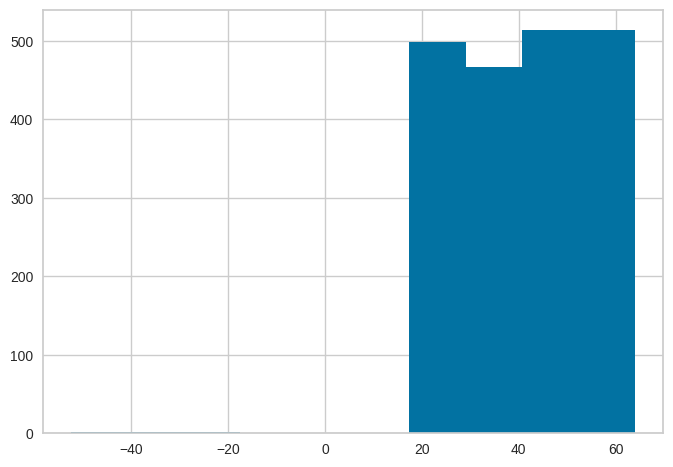

In [ ]:
plt.hist(base_credit.age);

Com o histograma, fica claro que a base contém valores negativos de idade, que deverão ser tratadas posteriormente.

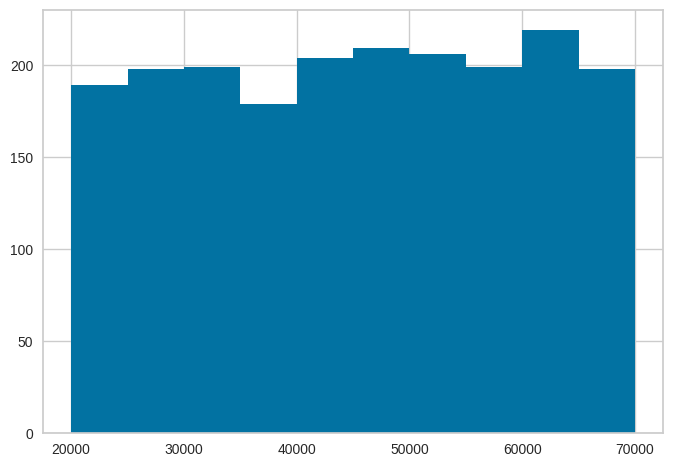

In [ ]:
plt.hist(base_credit.income);

Notamos que a base contém mais pessoas ganhando 65 mil por ano e menos pessoas ganhando 35 mil por ano.

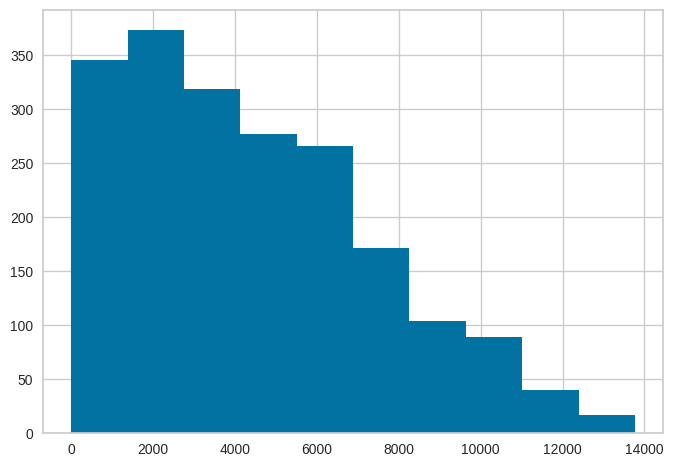

In [ ]:
plt.hist(base_credit.loan);

Nessa base contém maior números de pessoas com dívidas menor que 7 mil.

In [ ]:
# No github o gráfico estará anexado na branch Main
grafico = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color = 'default')
grafico.show()

#Tratamento de valores inconsistentes

O tratamento de valores inconsistentes é fundamental, pois dados errados podem impactar significativamente o desempenho dos algoritmos de aprendizado de máquina, comprometendo a qualidade das previsões.

Como observado anteriormente, a coluna age (idade) contém valores negativos, o que não faz sentido. Portanto, o primeiro passo no pré-processamento será identificar e tratar esses registros.

Para localizar essas inconsistências, utilizamos:

In [ ]:
# Filtrando registros onde a idade é menor que zero
base_credit.loc[base_credit.age < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


Existem três abordagens principais para lidar com valores inconsistentes em um conjunto de dados:

1. Remover a coluna inteira: útil quando a maioria dos valores da coluna está corrompida ou irrelevante para a análise.
2. Remover apenas os registros inconsistentes: adequado quando a quantidade de dados inválidos é pequena e sua exclusão não compromete a análise.
3. Corrigir os valores inconsistentes: ideal quando a quantidade de registros inválidos é pequena e a informação pode ser recuperada ou estimada.

A escolha do melhor método depende da quantidade de registros afetados. No nosso caso, como há apenas três registros com idade negativa, optamos por corrigir os valores ao invés de removê-los.

Podemos corrigir esses valores de duas maneiras:

1. Buscar a origem da informação para encontrar o valor real.
2. Utilizar métodos estatísticos para estimar um valor próximo ao real.

Como não temos acesso à origem dos dados, seguimos com a segunda abordagem, substituindo os valores negativos pela média das idades válidas.

In [ ]:
base_credit.age[base_credit.age > 0].mean()

np.float64(40.92770044906149)

In [ ]:
base_credit.loc[base_credit.age < 0, 'age'] = 40.92;

In [ ]:
base_credit.loc[[15, 21, 26]]

,clientid,income,age,loan,default
15,16,50501.726689,40.92,3977.287432,0
21,22,32197.620701,40.92,4244.057136,0
26,27,63287.038908,40.92,9595.286289,0


Essa técnica garante que os dados permaneçam consistentes sem perda de informações relevantes.

# Tratametos de valores faltantes

O tratamento de valores faltantes é uma etapa crucial, pois alguns algoritmos de aprendizado de máquina exigem que todos os dados estejam completos para garantir um bom desempenho e evitar erros durante o treinamento.

Como vimos anteriormente, a coluna age tem 3 valores nulos, e o tratamento mais adequado aqui pode ser substituir os valores faltantes pela média das idades válidas.

In [ ]:
base_credit.isnull().sum()

,0
clientid,0
income,0
age,3
loan,0
default,0


In [ ]:
base_credit.loc[pd.isnull(base_credit.age)]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [ ]:
base_credit.age.fillna(base_credit.age.mean(), inplace=True)

<ipython-input-83-c2a98f7e779e>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
base_credit.loc[[28, 30, 31]]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


Depois do tratamento da base de dados, podemos visualizar o gráfico com maior confiabilidade.

In [ ]:
# No github o gráfico estará anexado na branch Main
grafico = px.scatter_matrix(base_credit, dimensions=['age', 'income', 'loan'], color = 'default')
grafico.show()

Com a analise do gráfico gerado a partir da nossa base de dados, podemos tirar a conclusão que:


*   Quanto menor a idade, maior a probabilidade da pessoa não pagar o empréstimo.
*   Quanto maior a renda, maior a probabilidade da pessoa pegar um maior empréstimo.
*   Quanto maior o empréstimo, maior a probabilidade de não ser pago.



# Divisão entre previsores e classe

Para treinar um modelo de aprendizado de máquina, é importante definir quais serão as variáveis independentes (previsores) e a variável dependente (classe).

* Variáveis de Previsores (X): são as colunas que utilizaremos para fazer a previsão. No nosso caso, essas variáveis são income, age e loan.
* Variável de Classe (Y): é a coluna que contém o valor que queremos prever, ou seja, default, que indica se o cliente pagou ou não o empréstimo.

In [ ]:
X_credit = base_credit.iloc[:, 1:4].values
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [ ]:
y_credit = base_credit.iloc[:, 4].values
y_credit

array([0, 0, 0, ..., 1, 0, 0])

Agora, X contém as variáveis independentes (renda, idade e valor do empréstimo), enquanto Y contém a variável dependente (status de pagamento). Essas variáveis serão usadas nos algoritmos de aprendizado de máquina para treinar o modelo e realizar as previsões.

#Escalonamento dos valores

O escalonamento dos dados é uma etapa crucial no pré-processamento, pois muitos algoritmos de aprendizado de máquina são sensíveis à escala das variáveis. Se as variáveis não tiverem a mesma escala, o algoritmo pode atribuir mais importância a uma variável com valores mais altos, como é o caso da renda (income), que tende a ser maior do que a idade (age). Para garantir que todas as variáveis sejam tratadas de forma igual, é necessário realizar o escalonamento.

Existem duas técnicas principais para escalonamento:

**Padronização (Z-Score):**
A fórmula é:

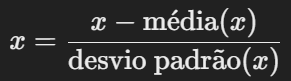



A padronização transforma os dados para que tenham média igual a 0 e desvio padrão igual a 1. É recomendada quando não há muitos outliers na base de dados, como é o caso da nossa.

**Normalização (Min-Max Scaling):**
A fórmula é:

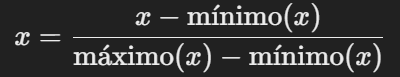

A normalização ajusta os valores para o intervalo [0, 1]. Este método é mais indicado quando a base de dados contém muitos outliers (valores discrepantes).

Como nossa base não contém muitos valores discrepantes, vamos utilizar padronização para escalonar as variáveis idade e salário.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit)
X_credit

array([[ 1.45393393,  1.36538093,  1.20281942],
       [-0.76217555,  0.5426602 ,  0.69642695],
       [ 0.83682073,  1.67417189,  1.17471147],
       ...,
       [-0.07122592, -0.97448519,  0.35420081],
       [-0.11000289,  1.73936739, -0.92675625],
       [ 1.682986  ,  1.14917639,  0.96381038]])

# Divisão da base em treinamento e teste

Uma etapa essencial no desenvolvimento de modelos de aprendizado de máquina é dividir a base de dados em dois subconjuntos: um para treinamento e outro para teste. A divisão permite que o modelo aprenda com uma parte dos dados (treinamento) e seja avaliado com outra parte que não foi utilizada no processo de treinamento (teste).

No nosso caso, como temos uma base de dados pequena (cerca de 2.000 registros), vamos adotar a seguinte estratégia:

* 75% da base será usada para o treinamento do modelo. Isso permitirá que o algoritmo aprenda a identificar padrões nos dados preditivos (como income, age, e loan) e associe-os ao resultado da variável classe (default).
* 25% da base será reservada para teste. Essa parte será usada para avaliar a performance do modelo, verificando sua capacidade de generalizar e fazer previsões precisas com dados que não foram vistos durante o treinamento.

Vamos usar o train_test_split da biblioteca scikit-learn para dividir a base de dados:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_credit_train, X_credit_test, y_credit_train, y_credit_test = train_test_split(X_credit, y_credit, test_size=0.25, random_state=0)

A divisão com random_state=0 garante que a divisão seja reproduzível, ou seja, ao rodar o código novamente, sempre teremos a mesma divisão.

In [ ]:
#Variaveis previsores
X_credit_train.shape, X_credit_test.shape

((1500, 3), (500, 3))

In [ ]:
# Variaveis classe
y_credit_train.shape, y_credit_test.shape

((1500,), (500,))

# Redes neurais artificiais

Para fazer a previsão da nossa base de dados de classificação, vamos utilizar o algoritmo de redes neurais, uma poderosa técnica de aprendizado de máquina que simula o funcionamento do cérebro humano para reconhecer padrões e fazer previsões.

As redes neurais são muito eficazes para tarefas de classificação, como a nossa, onde queremos prever se o cliente vai ou não pagar o empréstimo (default). Esse algoritmo é especialmente útil quando as relações entre as variáveis preditivas e a variável de classe são não-lineares.



In [ ]:
from sklearn.neural_network import MLPClassifier

Vamos usar o MLPClassifier do scikit-learn para construir e treinar uma rede neural com o objetivo de fazer previsões para nossa base de dados de classificação. O MLPClassifier implementa o algoritmo Multi-Layer Perceptron (MLP), que é uma rede neural de múltiplas camadas, e é muito eficiente para tarefas de classificação.

O MLPClassifier será configurado com os seguintes parâmetros:

* max_iter=2000: O número máximo de iterações (épocas) para o treinamento.
* verbose=True: Exibe o progresso do treinamento, ajudando a monitorar o processo. (Retirado para deixar o notebook mais limpo)
* tol=0.0000100: O critério de tolerância para a melhoria do erro. Se a melhoria for menor que esse valor, o treinamento será interrompido.
* solver='adam': O algoritmo de otimização Adam, que é eficiente para redes neurais, é usado para ajustar os pesos da rede.
* activation='relu': A função de ativação ReLU (Rectified Linear Unit) é uma das mais comuns em redes neurais devido à sua eficiência.
* hidden_layer_sizes=(50,50): A rede terá duas camadas ocultas, cada uma com 50 neurônios.

In [ ]:
rede_neural = MLPClassifier(max_iter=2000, tol=0.0000100, solver='adam', activation='relu', hidden_layer_sizes=(50,50))
rede_neural.fit(X_credit_train, y_credit_train);

Rodando as redes neurais podemos usar o predict para fazer as precisões do dados.

OBS: pode ter pequenas diferenças a cada vez que rodamos o camando da redes neurais

In [ ]:
previsoes = rede_neural.predict(X_credit_test)

Com as previsões feitas, vamos fazer o comparativo dos resultados que as redes neurais geraram com aquele 25% dos registros que separamos anteriormente.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_test, previsoes)

0.998

Com os parâmetros que utilizamos no nosso algoritmo, chegamos a uma taxa de acerto de 94% dos resultados.

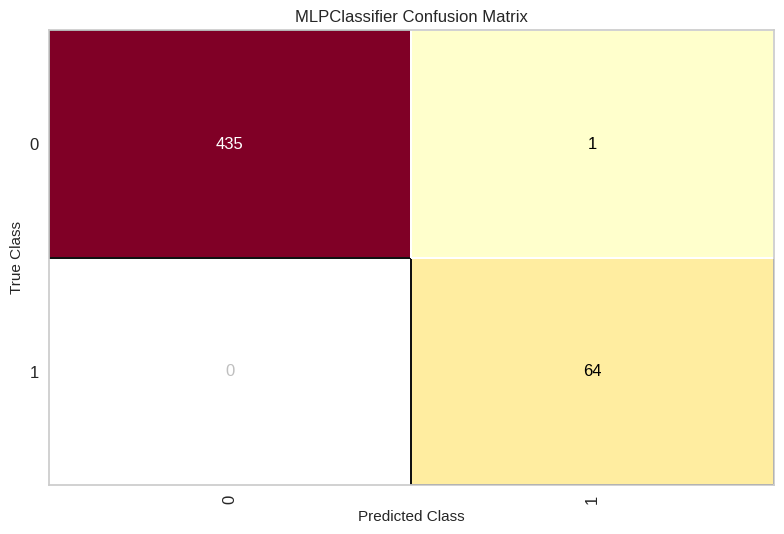

<Axes: title={'center': 'MLPClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural)
cm.fit(X_credit_train, y_credit_train)
cm.score(X_credit_test, y_credit_test)
cm.show()

0 = pessoa que paga o empréstimo

1 = pessoa que não paga o empréstimo

In [ ]:
print(classification_report(y_credit_test, previsoes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       436
           1       0.98      1.00      0.99        64

    accuracy                           1.00       500
   macro avg       0.99      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



Após analisar o gráfico das previsões feitas pelo algoritmo, observamos alguns pontos importantes sobre o desempenho do modelo.

* **Acertos no Caso das Pessoas que Não Pagam o Empréstimo:** O modelo teve 100% de acerto ao classificar corretamente todas as pessoas que não pagam o empréstimo. Isso significa que o algoritmo conseguiu identificar com precisão os clientes que possuem risco de inadimplência.

* **Erro na Classificação de uma Pessoa que Paga o Empréstimo:** No entanto, apesar de ter obtido ótimos resultados, o modelo cometeu um erro de classificação em apenas uma pessoa que pagou o empréstimo, classificando-a erroneamente como inadimplente (não pagadora). Isso indica que, apesar de ter sido muito bom em prever quem não paga, ele teve um desempenho um pouco mais fraco em identificar corretamente quem paga.